# GMM算法

In [6]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
import random
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


## 定义函数

In [7]:
def gen_rand_num(K):
    '''产生一个包含K个0～1的随机数list'''
    d = list()
    for i in range(K):
        d.append(random.random())
    return d

def cal_gaussian_pdf(X, u, std_sigma):
    '''高斯分布的概率密度函数, X为横坐标xticks序列'''
    d = list()
    for x in X:
        d.append(1 / ( pow(2 * np.pi, 0.5)  * std_sigma) * np.exp(- pow(x - u, 2) / (2 * pow(std_sigma, 2))))
    return d

## 生成测试数据

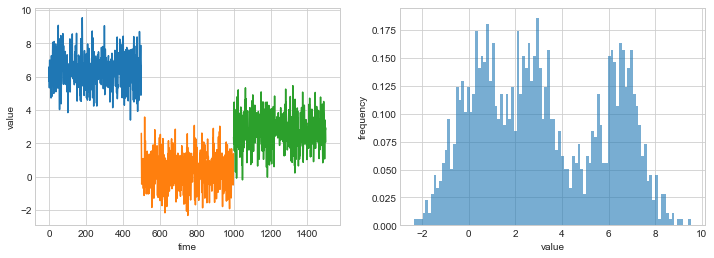

In [8]:
random.seed(42)
[c1, c2, c3] = [random.random(), random.random(), random.random()]
time_series_1 = list(np.random.randn(500) + 10 * c1)
time_series_2 = list(np.random.randn(500) + 10 * c2)
time_series_3 = list(np.random.randn(500) + 10 * c3)
time_series = time_series_1 + time_series_2 + time_series_3
plt.figure(1, figsize = [12, 4])
sns.set_style('whitegrid')
plt.subplot(121)
plt.plot(range(500), time_series_1)
plt.hold(True)
plt.plot(range(500, 1000), time_series_2)
plt.hold(True)
plt.plot(range(1000, 1500), time_series_3)
plt.hold(True)
plt.xlabel('time')
plt.ylabel('value')
plt.grid(True)

plt.subplot(122)
(y, xticks, a) = plt.hist(time_series, bins = 100, normed = True, alpha = 0.6)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

## 进行GMM计算

In [11]:
'初始化计算参数'
K = 5 # 分量数目
mius = list(np.ones(K) * np.mean(time_series) + np.mean(time_series) * np.array(gen_rand_num(K))) # 均值初值 
sigmas = list(np.ones(K) * np.var(time_series)) # 标准差初值
pis = gen_rand_num(K) # 分布权重初值 

'输入模型数据'
X = list(xticks[1 : ])
Y = time_series
N = len(Y)

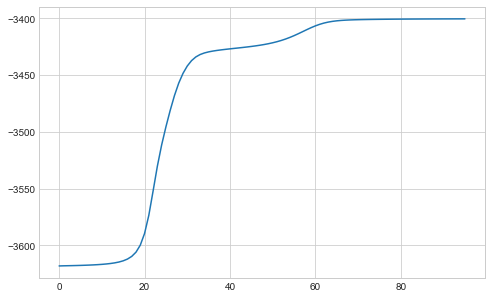

In [12]:
max_iter_times = 10000
max_log_likelihood = list()
eps = 0.01
for iteration in range(max_iter_times):
    'E step: 计算gamma'
    gaussian_pdf_value = list()
    for k in range(K):
        gaussian_pdf_value.append(cal_gaussian_pdf(Y, mius[k], pow(sigmas[k], 0.5)))
    
    gaussian_pdf_value_weighted = list()
    for k in range(K):
        gaussian_pdf_value_weighted.append([pis[k] * p for p in gaussian_pdf_value[k]])
    
    gamma = list() # gamma是与X等长度的序列
    gaussian_pdf_weighted_sum = [sum(gaussian_pdf_value_weighted[i][j] for i in range(K)) for j in range(N)]
    for k in range(K):
        gamma.append([gaussian_pdf_value_weighted[k][i] / gaussian_pdf_weighted_sum[i] for i in range(N)])
    
    'M step: 参数更新'
    ## 1. miu更新
    for k in range(K):
        Nk = sum(gamma[k])
        mius[k] = sum([gamma[k][i] * Y[i] for i in range(N)]) / Nk
        
    ## 2. sigma更新
    for k in range(K):
        Nk = sum(gamma[k])
        sigmas[k] = sum([gamma[k][i] * pow((Y[i] - mius[k]), 2) for i in range(N)]) / Nk
        
    ## 3. pi更新
    for k in range(K):
        Nk = sum(gamma[k])
        pis[k] = Nk / N
    
    '计算对数似然函数'
    max_log_likelihood.append(\
                              sum([np.log(sum(pis[k] * cal_gaussian_pdf(\
                                                                        list([Y[i]]), mius[k], pow(sigmas[k], 0.5)\
                                                                       )[0] for k in range(K))) for i in range(N)])\
                             )
    if iteration >= 1:
        if abs(max_log_likelihood[iteration] - max_log_likelihood[iteration - 1]) <= eps:
            break
            
plt.figure(2, figsize = [8, 5])
plt.plot(range(iteration + 1), max_log_likelihood)
plt.hold(True)
plt.grid(True)
plt.pause(0.1)